# Constructing quantum gates as matrices for a multi-qubit quantum system

The matrices for qubit gates are provided for the dimension appropiate to act directly on a single qubits. The question is how to extend the matrices to act on mulitqubit system that is represented by the column vector. This article gives short introduction into qubits and quantum gates, then it shows on the examples how to extends one and two qubit gates for multi qubit system using the matrix algebra.

## Introduction

*Latex math*
$$ \def\ket#1{\lvert #1 \rangle}\def\bra#1{\langle #1 \rvert} $$

The quantum computing that bases on quantum gates, can be also performed using matrices. Making the quantum computation, in that case, is doing the matrix algebra where the quantum state is represented by the vector and the gates are represented by the matrices. 

The two basis states that represents `0` and `1` are represented by column vectors:

$ \left| 0 \right\rangle = {\begin{bmatrix}1 \\ 0\end{bmatrix}} $,

$ \left| 1 \right\rangle = {\begin{bmatrix}0 \\ 1\end{bmatrix}} $.

To build more complex states, that consists of several qubits, we use the tensor product:

$ \ket{01} = \left| 0 \right\rangle \otimes \left| 1 \right\rangle 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}} \otimes {\begin{bmatrix}0 \\ 1\end{bmatrix}} 
= {\begin{bmatrix}1 \\ 0\end{bmatrix}}  {\begin{bmatrix}0 \\ 1\end{bmatrix}}^{T}
= {\begin{bmatrix}1 \\ 0\end{bmatrix}} {\begin{bmatrix}0 & 1\end{bmatrix}}
= {\begin{bmatrix}0\\ 1 \\ 0 \\ 0\end{bmatrix}}.
$


## One qubit gate in multi-qubit system

There are several one-qubit gates eg. the Hadamard gate $H$, Pauli's gate $X$, Identity $I$. You can learn more about one-qubit gates in the [Qiskit textbook](https://qiskit.org/textbook/ch-gates/quantum-gates.html). Let's use the Pauli's X gate for the following example to demonstrate how to prepare the gate that acts on two-qubit system.

The Pauli X gate flips the qubit basis state. It is represented by the matrix:

$ X = {\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}} $,


Applying this gate on the qubit in the $ \ket{0} $ state results in $ \ket{1} $ state:


$ X\left| 0 \right\rangle = {\begin{bmatrix}0 & 1\\1 & 0\end{bmatrix}} {\begin{bmatrix}1 \\ 0\end{bmatrix}} = {\begin{bmatrix}0 \\ 1 \end{bmatrix}} = \left| 1 \right\rangle$,

But how to perform the same operation if we have got a two-qubit system? For example in the following state:

$$ \ket{01} = \begin{bmatrix}0\\ 1 \\ 0 \\ 0\end{bmatrix} $$

we only want to flip the first qubit to receive:

$$ \ket{11} = \begin{bmatrix}0\\ 0 \\ 0 \\ 1\end{bmatrix}.$$

We cannot use directly the X gate as it doesn't fit the dimensions of the state. We need to prepare a special version of the $X$ gate, a $X_a$ gate, which will act only on the first qubit:

$$ X_a \ket{01} = \ket{11}.$$ 

To construct the matrix $X_a$ that makes the above calculation we need to use the $X$ gate for the first qubit and Identity gate $I$ for the second. The Identity gate is the special gate that leaves the basis states unchanged:

$$ I = {\begin{bmatrix}1 & 0\\0 & 1\end{bmatrix}}, $$

We construct the desired $X_a$ gate making the tensor product of two gates:


$$ X_a = X \otimes I = 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 \\ 
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 \end{bmatrix}
,$$

and we can check that it works correctly:
$$ X_a\ket{01} = 
\begin{bmatrix} 
0 & 0 & 1 & 0 \\ 
0 & 0 & 0 & 1 \\ 
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 
\end{bmatrix} 
\begin{bmatrix}0\\ 1 \\ 0 \\ 0\end{bmatrix} 
= 
\begin{bmatrix}0\\ 0 \\ 0 \\ 1\end{bmatrix}
= \ket{11}
.$$

Of course, if we would like to flip the *b* qubit we need to construct the $X_b$ gate swapping the $X$ and $I$ gate in the tensor product:

$$ X_b = I \otimes X = 
\begin{bmatrix} 
0 & 1 & 0 & 0 \\ 
1 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 1 \\ 
0 & 0 & 1 & 0 
\end{bmatrix}
,$$

$$ X_b\ket{01} = 
\begin{bmatrix} 
0 & 1 & 0 & 0 \\ 
1 & 0 & 0 & 0 \\ 
0 & 0 & 0 & 1 \\ 
0 & 0 & 1 & 0 
\end{bmatrix}
\begin{bmatrix}0\\ 1 \\ 0 \\ 0\end{bmatrix} 
= 
\begin{bmatrix}1\\ 0 \\ 0 \\ 0\end{bmatrix}
= \ket{00}
.$$

The general idea of constructing the matrix for the qubit gate $M$ in the multi-qubit system is to make the tensor product of the desired gates $G$ and placing the $I$ Identity gate for the qubits that should not be affected. The working gate $G$ is placed in the equation on the position corresponding the qubits in the system:

$$ M = I_1 \otimes I_2 \otimes .... \otimes G_n \otimes ... \otimes I_m, $$

where $n$ is the index of the qubit we would like to act on, and the $m$ is for the size of the qubit system.

The other common example could be creating a uniform superposition state what is done by applying the Hadamard gate $H$ for all qubits in the system. For the three qubit system the final matrix would be built as follows:

$$ M = H \otimes H \otimes H $$


## Two qubit gates in the mulitqubit system

The main feature of a two-qubit controlled-U gate is that it performs an operation on some qubits depending on the value of the other qubit. The most popular is the $CNOT$ gate. It performs the  $X$  gate operation on the target qubit, only if the control qubit is in the $\ket{1}$ state.

$$ CNOT =  
\begin{bmatrix} 
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 1 \\  
0 & 0 & 1 & 0 
\end{bmatrix}
$$


The example for fliping the second qubit: $CNOT\ket{10} = \ket{11}$


$$ CNOT\ket{10} 
=
\begin{bmatrix} 
1 & 0 & 0 & 0 \\ 
0 & 1 & 0 & 0 \\ 
0 & 0 & 0 & 1 \\  
0 & 0 & 1 & 0 
\end{bmatrix}
\begin{bmatrix}0\\ 0 \\ 1 \\ 0\end{bmatrix}
=
\begin{bmatrix}0\\ 0 \\ 0 \\ 1\end{bmatrix}
= \ket{11}$$ 

But how to prepare the matrix for the operation for the 3-qubit system, where we want to operate over the third qubit with respect to the first one, omitting the second qubit?


$$ CNOT_{ac}|100> = |101> $$

The general procedure for constructing the Controlled-U gate can be written down as algebraic formula:

$$CU=
\underbrace{\ket{0}\bra{0}}_{\text{control}}
\otimes
\underbrace{I}_{\text{target}}
+
\underbrace{\ket{1}\bra{1}}_{\text{control}}
\otimes
\underbrace{U}_{\text{target}}
$$

to extend it for the multiqubit system we need to extend the formula with $I$ for all uninvolved qubits.

Developing it for our example 3 qubit system we need to prepare the CNOT gate building it from the sum of the two matrices. In the first component for we place the outer product: $\ket{0}\bra{0}$ for the control qubit, and the Identity for the other qubits. In the second component, we place $\ket{1}\bra{1}$ for the control qubit, the Identity for all uninvolved qubit and for the target qubits the desired gate.


$$ CNOT_{ac} = 
\underbrace{\ket{0}\bra{0}}_{\text{control}}^{\text{a}} 
\otimes
\underbrace{I}_{\text{uninvolved}}^{\text{b}} 
\otimes
\underbrace{\ket{0}\bra{0}}_{\text{target}}^{\text{c}} 
+
\underbrace{\ket{1}\bra{1}}_{\text{control}}^{\text{a}} 
\otimes
\underbrace{I}_{\text{uninvolved}}^{\text{b}} 
\otimes
\underbrace{X}_{\text{target}}^{\text{c}} 
$$

## Qiskit and numpy examples

In `numpy` to we use `numpy.kron()` for the tensor product.
Qiskit provides the matrix representation for the gates in the `qiskit.extensions` package with `to_matrix()` method.

In [1]:
# Prepartion part

import numpy as np
from qiskit.extensions import HGate, CnotGate, IdGate, XGate, CzGate, ZGate

# |0>
Zero = np.array([[1.],
                 [0.]]) 
# |1>
One = np.array([[0.],
                [1.]]) 

H = HGate().to_matrix()
I = IdGate().to_matrix()
X = XGate().to_matrix()

### Application of the Hadamard gate on 3-qubit system

$$ H\ket{000} = \ket{+++}$$

Let's prepare 3-qubit system in $\ket{000}$ state: $$\ket{000} = \ket{0}\otimes\ket{0}\otimes\ket{0}$$

In [2]:
s3 = np.kron(np.kron(Zero, Zero), Zero)
print(s3)

[[1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]


The $\ket{000}$ is represented by the above column vector. The next step is the preparation of the Hadamard gate for our state vector and its application:

In [3]:
H_3 = np.kron(np.kron(H,H),H)
Hs3 = np.dot(H_3, s3)
print(Hs3)

[[0.35355339+0.j]
 [0.35355339+0.j]
 [0.35355339+0.j]
 [0.35355339+0.j]
 [0.35355339+0.j]
 [0.35355339+0.j]
 [0.35355339+0.j]
 [0.35355339+0.j]]


Now let's try go back to the intial state:
$$ H\ket{+++} = \ket{000}$$

In [4]:
np.around(np.dot(H_3, Hs3), 10)

array([[1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

as we can see we successfully got back to the initial state.

Below is the `qiskit` implementation of the example:

In [5]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit import IBMQ, BasicAer, execute

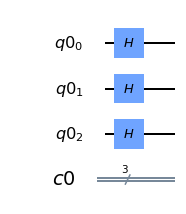

In [6]:
q3 = QuantumRegister(3)
c3 = ClassicalRegister(3)
circ = QuantumCircuit(q3, c3)

circ.h(q3)
circ.draw(output='mpl')

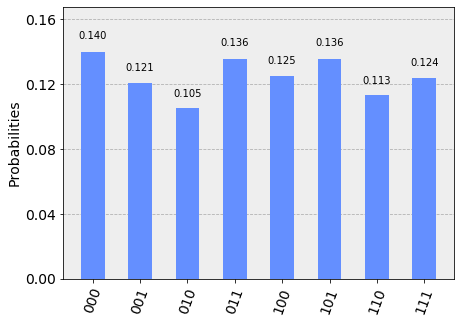

In [7]:
circ.measure(q3, c3)
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024
results = execute(circ, backend=backend, shots=shots).result()
answer = results.get_counts()
plot_histogram(answer)

### Application of the CNOT gate on 3-qubit system

$$ CNOT\ket{100} = \ket{101} $$
According to the description in the previous chapter we need to prepare the appropriate matrix for our system:

In [8]:
_00 = Zero * Zero.transpose() # |0><0|
_11 = One * One.transpose() # |1><1|

CX_ac  = np.kron(np.kron(_00, I), _00) + np.kron(np.kron(_11, I), X)

In [9]:
s_6 = np.kron(np.kron(One, Zero), Zero)
print(s_6)

[[0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]]


In [10]:
s_7 = np.dot(CX_ac, s_6)
print(s_7)

[[0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [0.+0.j]
 [1.+0.j]
 [0.+0.j]
 [0.+0.j]]


As we can see we have successfully achieved the $\ket{101}$ state, as the `1` is on the 5th position.

Applying the CX_ac again should bring us back to the $\ket{100}$ state, as the 3rd qubit should be switched back.

In [11]:
np.dot(CX_ac, s_7)

array([[0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j],
       [1.+0.j],
       [0.+0.j],
       [0.+0.j],
       [0.+0.j]])

## Summary

It was shown how quantum gates are represented by the matrices, and how to build appropriate matrices to act on a desired qubits in the multi-qubit entangled system.

**Acknowledgements**

I have to express my appreciation to [Niel de Beaudrap](https://www.researchgate.net/scientific-contributions/2081801243_Niel_de_Beaudrap) for sharing his knowledge on the [StackExchange](https://quantumcomputing.stackexchange.com/a/4255/9760), what was very helpful for this article.